<a href="https://colab.research.google.com/github/tudorgelab/ComputerVision_Colab/blob/main/%EC%BB%B4%ED%93%A8%ED%84%B0AI%EA%B3%B5%ED%95%99%EA%B3%BC_%EB%B0%95%ED%98%84%EC%A4%80_11_12%EA%B0%95%EC%8B%A4%EC%8A%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>**Colab Computer Vision Tutorial 08** created by [Jooyeon Lee](http://leejooyeon.com/) | Check out other colab codes on [GITHUB](https://github.com/ganadaralabs/ComputerVision_Colab)


#실습8_**이미지 매칭과 추적**

##01 이미지 매칭

- 서로 다른  두 이미지를 비교 후 이미지 속 객체가 동일한지 확인

- 이미지에서 의미 있는 특징을 적절한 숫자로 변환해 비교


**01.1 평균 해시 매칭(Average Hash Matching)**

- 특징 벡터를 구하기 위해 평균값을 사용
- 비교를 하고자 하는 두 이미지를 이미지를 가로 세로 비율과 무관하게 특정한 크기로 축소
- 픽셀 전체의 평균값을 구해서 각 픽셀의 값이 평균보다 작으면 0, 크면 1로 변경
- 비교할 때 사용하는 알고리즘:


  1. 유클리디안 거리(Euclidean Distance)
    - 두 점 사이의 거리를 계산할 때 흔히 쓰는 방법

    ![img](https://upload.wikimedia.org/wikipedia/commons/5/55/Euclidean_distance_2d.svg)


  2. 해밍 거리(Hamming Distance)
    - 두 개의 문자열에서 같은 위치에 있는 서로 다른 문자 쌍의 갯수

    ![img](https://mblogthumb-phinf.pstatic.net/MjAyMDAzMzBfOTMg/MDAxNTg1NTczNzYzMTc4.OhusSOJptPXePHZFcG9X6hib1MTcXFJtPDQhP3K0o-Yg.CU6D4fXkb_YTM0gTvKQciYm7dIp0z2xCKertXmsXnzEg.PNG.simjk98/image.png?type=w2)



In [5]:
#구글 드라이브 마운트 하기
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**01.1-1 이미지 해시 처리 하기**

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]]

ffffffffff7ffd7ffd7ffc3ffc3ffc3ffc3ffe3ffe3ffe3ffe3ffe3ffe3ffc3f


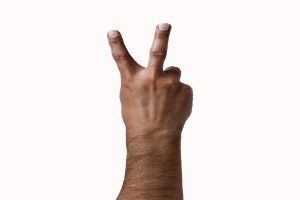

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/photos/shapes/template/rabbitshape.jpg")
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hand300x200.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 8x8 크기로 축소
gray = cv2.resize(gray, (16,16))
# 영상의 평균값 구하기
avg = gray.mean()
# 평균값을 기준으로 0과 1로 변환
bin = 1 * (gray > avg)
print(bin)
print("")

# 2진수 문자열을 16진수 문자열로 변환
dhash = []
for row in bin.tolist():
    s = ''.join([str(i) for i in row])
    dhash.append('%02x'%(int(s,2)))
dhash = ''.join(dhash)
print(dhash)

cv2_imshow(img)


**01.1-2 해싱한 이미지 매칭하기**

Caltech 101 이미지 데이터셋: (1)[소개 링크](http://www.vision.caltech.edu/Image_Datasets/Caltech101/) (2)[파일 다운로드 링크](https://drive.google.com/file/d/137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp/view)에서 이미지 데이터셋 다운로드  


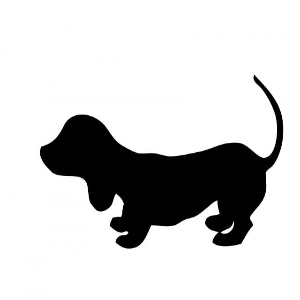

0.1640625


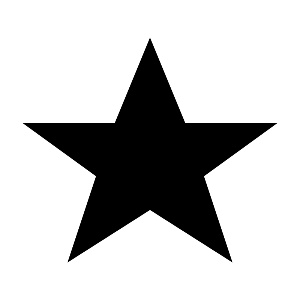

0.0


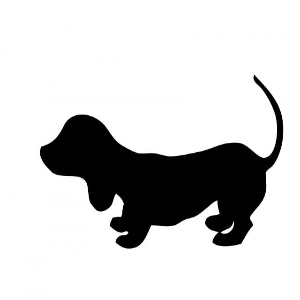

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob


img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/template/dogshape.jpg')
search_dir = '/content/drive/MyDrive/Colab Notebooks/photos/shapes'

# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/101_ObjectCategories/crab/image_0033.jpg')
# search_dir = '/content/drive/MyDrive/Colab Notebooks/photos/101_ObjectCategories'

cv2_imshow(img)

# 이미지를 16x16 크기의 평균 해쉬로 변환
def img2hash(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (16, 16))
    avg = gray.mean()
    bi = 1 * (gray > avg)
    return bi

# 해밍거리 측정 함수
def hamming_distance(a, b):
    a = a.reshape(1,-1)
    b = b.reshape(1,-1)
    # 같은 자리의 값이 서로 다른 것들의 합
    distance = (a !=b).sum()
    return distance

# 기준 이미지 해쉬 구하기
query_hash = img2hash(img)

# 이미지 데이터 셋 디렉토리의 모든 영상 파일 경로
img_path = glob.glob(search_dir+'/**/*.jpg')

for path in img_path:
    img_comp = cv2.imread(path)
    # 데이터 셋 영상 한 개의 해시
    a_hash = img2hash(img_comp)
    # 해밍 거리 산출
    dst = hamming_distance(query_hash, a_hash)
    if dst/256 < 0.25: # 해밍거리 25% 이내만 출력
        print(dst/256)
        cv2_imshow(img_comp)


**01.2 템플릿 매칭 (Template Matching)**

- 템플릿 매칭은 특정 물체에 대한 이미지를 준비해 두고 그 물체가 포함되어 있을 것이라고 예상할 수 있는 이미지와 비교하여 매칭 되는 위치를 찾음
- 템플릿 이미지는 비교할 이미지보다 크기가 항상 작아야 함
- cv2.matchTemplate() 함수는 입력 이미지(img)에서 템플릿 이미지(templ)를 슬라이딩하면서 주어진 메서드에 따라 매칭을 수행
- cv2.matchTemplate() 함수의 반환 값은 (입력 이미지의 가로 - 템플릿 이미지의 가로 + 1) x (입력 이미지의 세로 - 템플릿 이미지의 세로 + 1) 크기의 2차원 배열
- 이 배열의 최대, 최소 값을 구하면 원하는 최선의 매칭 값과 매칭점을 구할 수 있음
  - cv2.minMaxLoc(): 입력 배열에서의 최소, 최대 값과 최소 값, 최대 값의 좌표도 반환

<br>

```
result = cv2.matchTemplate(img, templ, method, result, mask)
```
**Parameters:**
- img: 입력 이미지
= templ: 템플릿 이미지
- method: 매칭 메서드
  - cv2.TM_SQDIFF: 제곱 차이 매칭, 완벽 매칭:0, 나쁜 매칭: 큰 값
  - cv2.TM_SQDIFF_NORMED: 제곱 차이 매칭의 정규화
  - cv2.TM_CCORR: 상관관계 매칭, 완벽 매칭: 큰 값, 나쁜 매칭: 0
  - cv2.TM_CCORR_NORMED: 상관관계 매칭의 정규화
  - cv2.TM_CCOEFF: 상관계수 매칭, 완벽 매칭:1, 나쁜 매칭: -1
  - cv2.TM_CCOEFF_NORMED: 상관계수 매칭의 정규화
- result(optional): 매칭 결과, (W - w + 1) x (H - h + 1) 크기의 2차원 배열
- mask(optional): TM_SQDIFF, TM_CCORR_NORMED인 경우 사용할 마스크

<br>

```
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src, mask)
```
**Parameters:**
- src: 입력 1 채널 배열
- minVal, maxVal: 배열 전체에서의 최소 값, 최대 값
- minLoc, maxLoc: 최소 값과 최대 값의 좌표 (x, y)

<br>



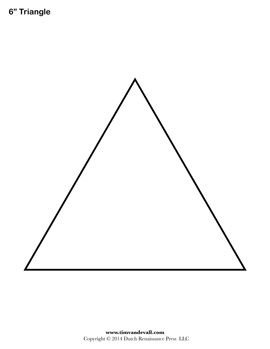

cv2.TM_CCOEFF_NORMED -0.15540729463100433 0.09997788071632385 (723, 171) (166, 169)


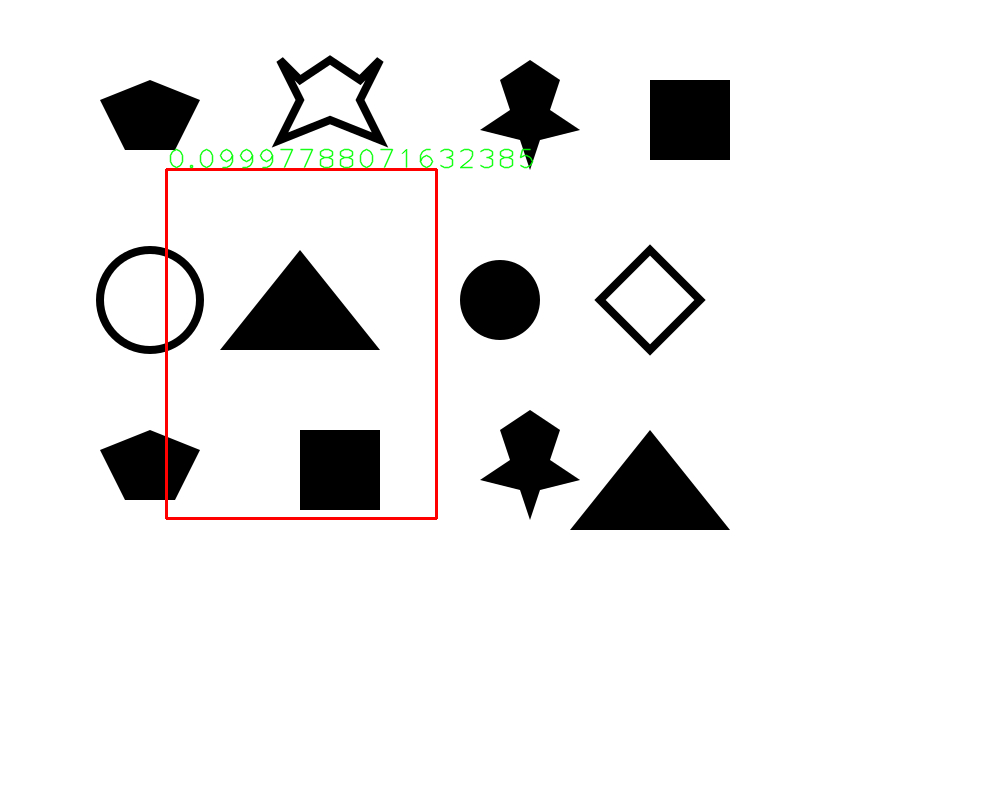

cv2.TM_CCORR_NORMED 0.8757833242416382 0.9943953156471252 (274, 159) (730, 25)


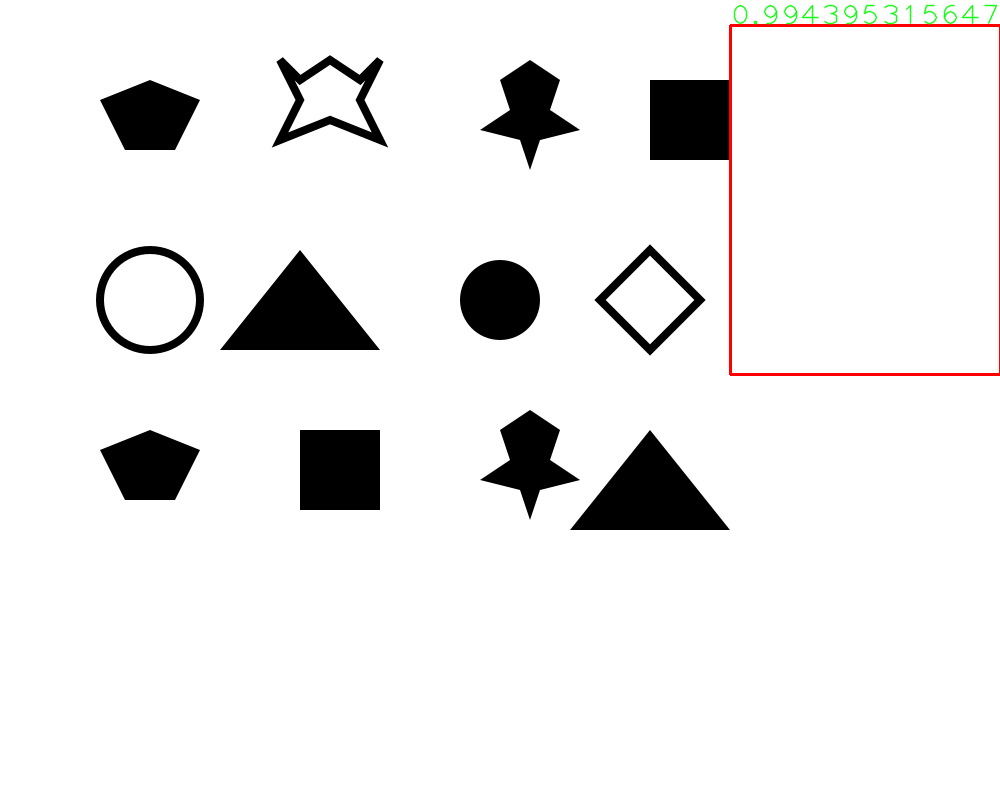

cv2.TM_SQDIFF_NORMED 0.01131481397897005 0.2618773579597473 (730, 25) (271, 242)


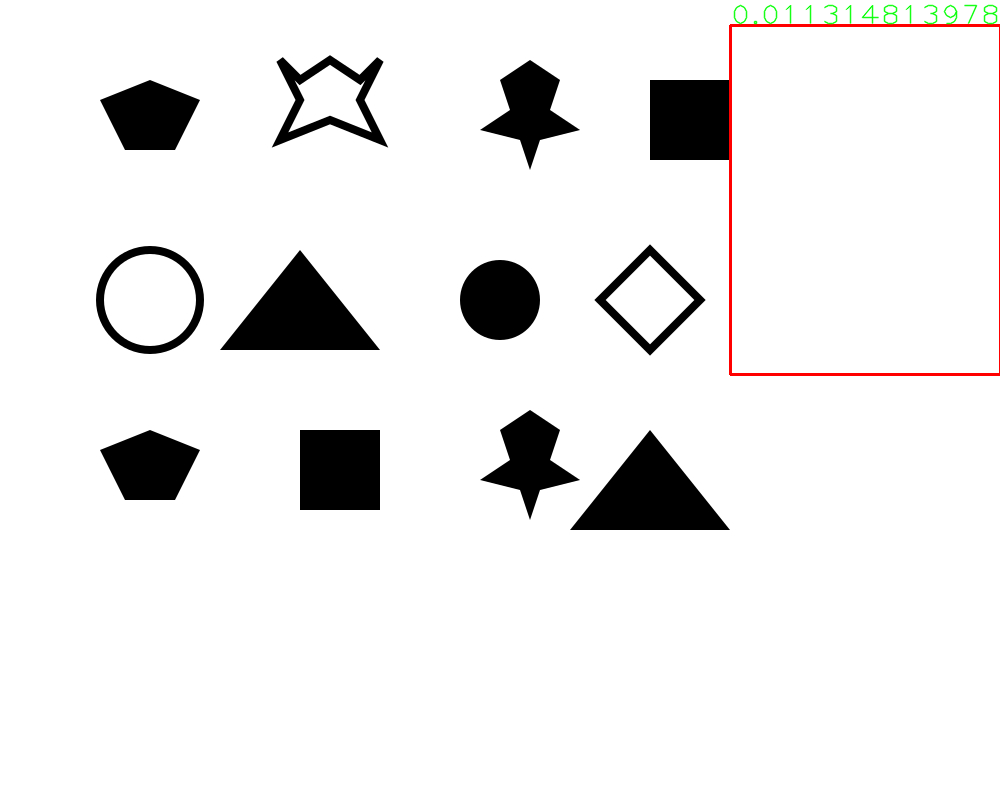

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 입력이미지와 템플릿 이미지 읽기
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes.jpg')
template = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/template/triangleshape.jpg')

# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people.jpg')
# template = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people_template.jpg')


th, tw = template.shape[:2]
cv2_imshow(template)

# 3가지 매칭 옵션
methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF_NORMED']
for i, method_name in enumerate(methods):
    img_draw = img.copy()
    method = eval(method_name)
    # 템플릿 매칭
    res = cv2.matchTemplate(img, template, method)
    # 최대, 최소값과 그 좌표 구하기
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(method_name, min_val, max_val, min_loc, max_loc)

    # TM_SQDIFF의 경우 최소값이 좋은 매칭, 나머지는 그 반대
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
        match_val = min_val
    else:
        top_left = max_loc
        match_val = max_val
    # 매칭 좌표 구해서 사각형 표시
    bottom_right = (top_left[0] + tw, top_left[1] + th)
    cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255),2)
    # 매칭 포인트 표시
    cv2.putText(img_draw, str(match_val), top_left, \
                cv2.FONT_HERSHEY_PLAIN, 2,(0,255,0), 1, cv2.LINE_AA)
    cv2_imshow(img_draw)


**01.3 복수 템플릿 매칭**

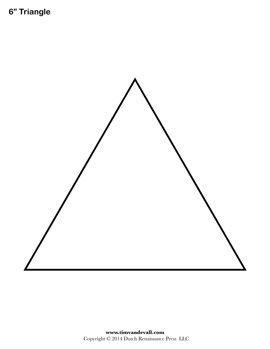

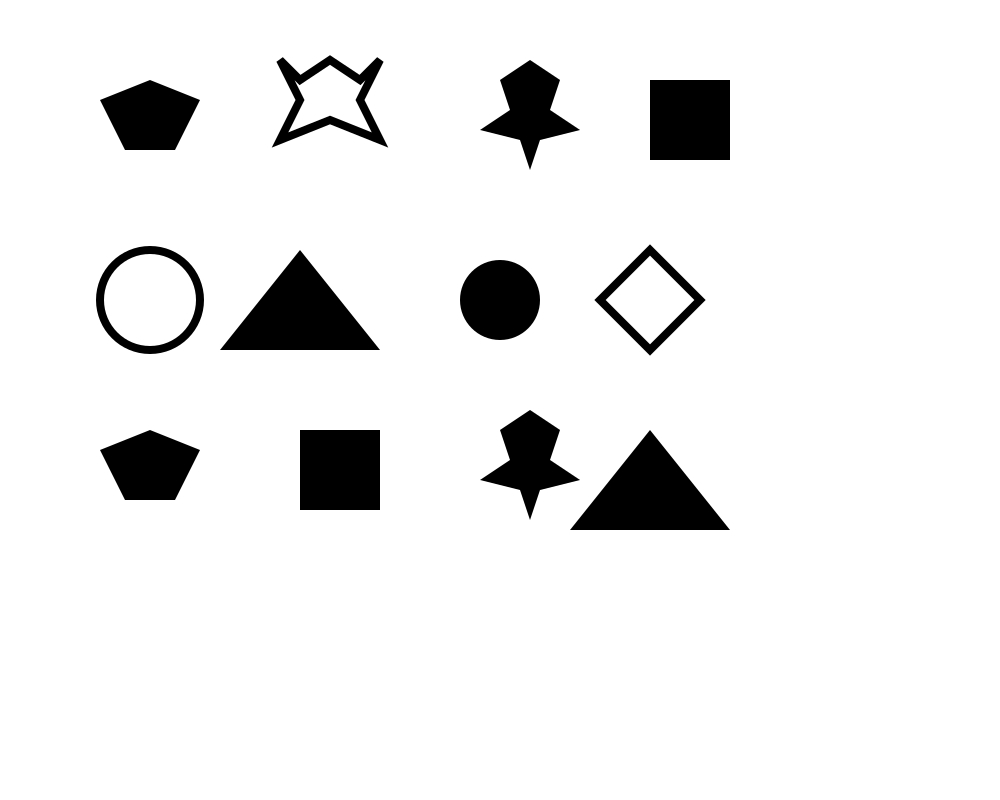

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/shapes.jpg')
template = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/template/triangleshape.jpg',cv2.IMREAD_GRAYSCALE)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

w, h = template.shape[::-1]
res = cv2.matchTemplate(gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2_imshow(template)
cv2_imshow(img)

## 02 이미지의 특징
- 이미지 특징점(Keypoints): 이미지에서 특징이 되는 부분
- 이미지끼리 서로 매칭이 되는지 확인을 할 때 각 이미지에서의 특징이 되는 부분끼리 비교
- 보통 특징점이 되는 부분은 물체의 모서리나 코너


**02.1 해리스 코너 검출 (Harris Corner Detection)**
- 물체를 인식할 때 물체의 코너가 중요
- 해리스 코너 검출은 소벨(Sobel) 미분으로 경곗값을 검출하면서 경곗값의 경사도 변화량을 측정하여 변화량이 수직, 수평, 대각선 방향으로 크게 변화하는 것을 코너로 판단
-  Harris 함수이 반환한 값에 임계점을 설정해서 사용(후처리 필요)

<br>

```
dst = cv2.cornerHarris(src, blockSize, ksize, k, dst, borderType)
```
**Parameters:**
- src: 입력 이미지, 그레이 스케일
- blockSize: 이웃 픽셀 범위
- ksize: 소벨 미분 필터 크기
- k(optional): 코너 검출 상수 (보토 0.04~0.06)
- dst(optional): 코너 검출 결과 (src와 같은 크기의 1 채널 배열, 변화량의 값, 지역 최대 값이 코너점을 의미)
- borderType(optional): 외곽 영역 보정 형식


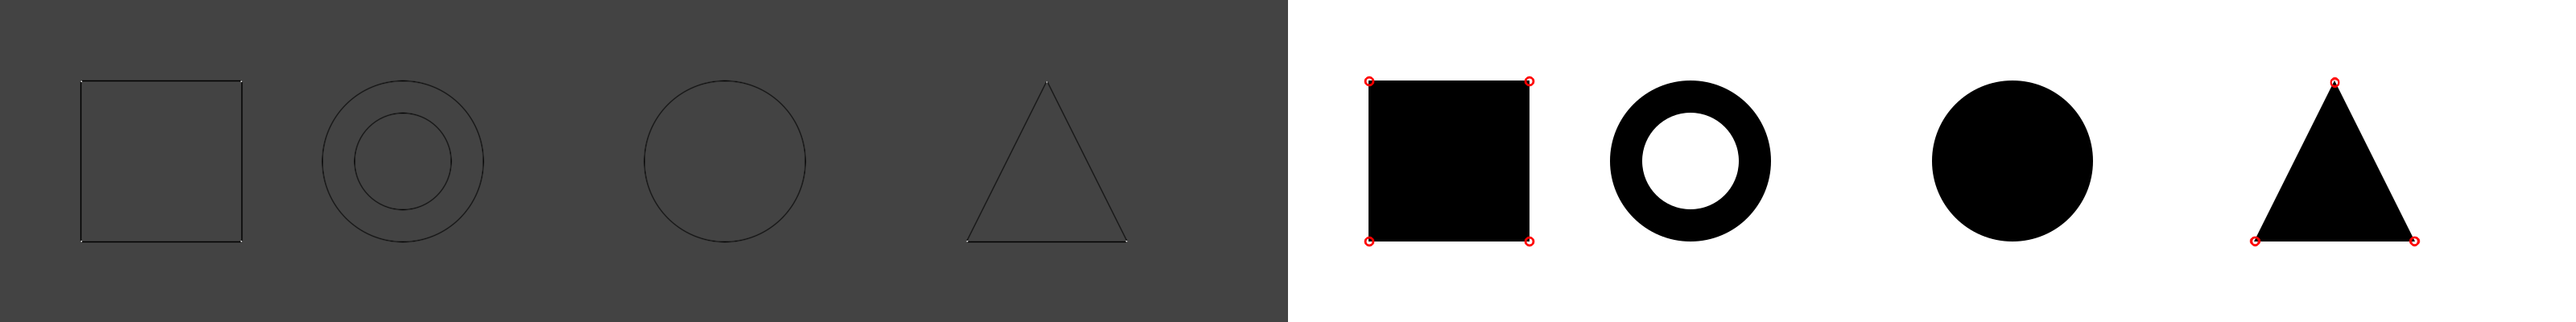

In [17]:
import cv2
import numpy as np

#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg')
# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/fish300x200.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/4shapes.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해리스 코너 검출
corner = cv2.cornerHarris(gray, 2, 3, 0.04)
# 변화량 결과의 최대값 10% 이상의 좌표 구하기
coord = np.where(corner > 0.1* corner.max())
coord = np.stack((coord[1], coord[0]), axis=-1)

# 코너 좌표에 동그리미 그리기
for x, y in coord:
    cv2.circle(img, (x,y), 5, (0,0,255), 1, cv2.LINE_AA)

# 변화량을 영상으로 표현하기 위해서 0~255로 정규화
corner_norm = cv2.normalize(corner, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# 화면에 출력
corner_norm = cv2.cvtColor(corner_norm, cv2.COLOR_GRAY2BGR)
merged = np.hstack((corner_norm, img))
cv2_imshow( merged)


**02.2 시-토마시 검출 (Shi & Tomasi Detection)**

- 해리스 코너 검출을 개선한 알고리즘



```
corners = cv2.goodFeaturesToTrack(img, maxCorners, qualityLevel, minDistance, corners, mask, blockSize, useHarrisDetector, k)
```
**Parameters:**
- img: 입력 이미지
- maxCorners: 얻고 싶은 코너의 개수, 강한 것 순으로
- qualityLevel: 코너로 판단할 스레시홀드 값
- minDistance: 코너 간 최소 거리
- mask(optional): 검출에 제외할 마스크
- blockSize(optional)=3: 코너 주변 영역의 크기
- useHarrisDetector(optional)=False: 코너 검출 방법 선택
  - True: 해리스 코너 검출 방법
  - False: 시와 토마시 코너 검출 방법
- k(optional): 해리스 코너 검출 방법에 사용할 k 계수
- corners: 코너 검출 좌표 결과, N x 1 x 2 크기의 배열, 실수 값이므로 정수로 변형 필요



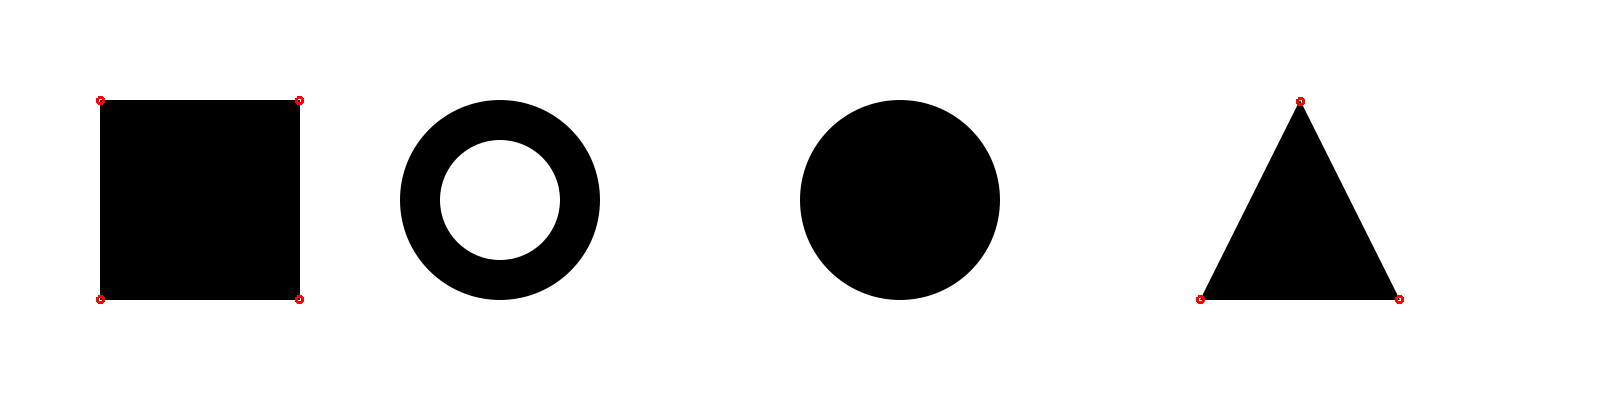

In [24]:
import cv2
from google.colab.patches import cv2_imshow

# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg')
# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/fish300x200.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/4shapes.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 5, blockSize=3, useHarrisDetector=False, k=0.03)

# for i in corners:
#     cv2.circle(img, tuple(i[0]), 3, (0, 0, 255), 2)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (int(x), int(y)), 3, (0, 0, 255), 2)

cv2_imshow(img)



**02.3 FAST(Features from Accelerated Segment Test)**

- 다른 방식에 비해 특징점 추출의 정확도를 떨어지지만 실시간에서 활용할 수 있는 속도를 제공하면서 어느 정도의 특징점 추출 방법
- 특정 화소 인근의 화소값을 16개 뽑고 특정 화소 점보다 임계치를 더한 값보다 밝거나 임계치를 뺀 값보다 어두운 것들이 9개 이상이면 코너로 판단
  ![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/fast_speedtest.jpg)
- 특징점이 비슷한 부분에서 너무 많이 추출되는 것을 방지하기 위해 억제(Non-maximal Suppression)하는 절차가 적용
- 근 픽셀 화소값 비교를 위한 임계치 기본값은 10이고 비슷한 지점에서 너무 많은 특징점이 추출되는 것을 방지하기 위한 nonmaxSuppression가 True로 지정

```
cv2.FastFeatureDetector_create(, threshold=None, nonmaxSuppression=None, type=None) -> retval
```
**Parameters:**
- threshold: 중심 픽셀 값과 주변 픽셀 값과의 차이 임계값. 기본값은 10. 30~60 적절
- nonmaxSuppression: 비최대 억제 수행 여부. 기본값은 True.
- type: 코너 검출 방법. 기본값은 cv2.FAST_FEATURE_DETECTOR_TYPE_9_16.
- retval: FastFeatureDetector 객체


Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  28


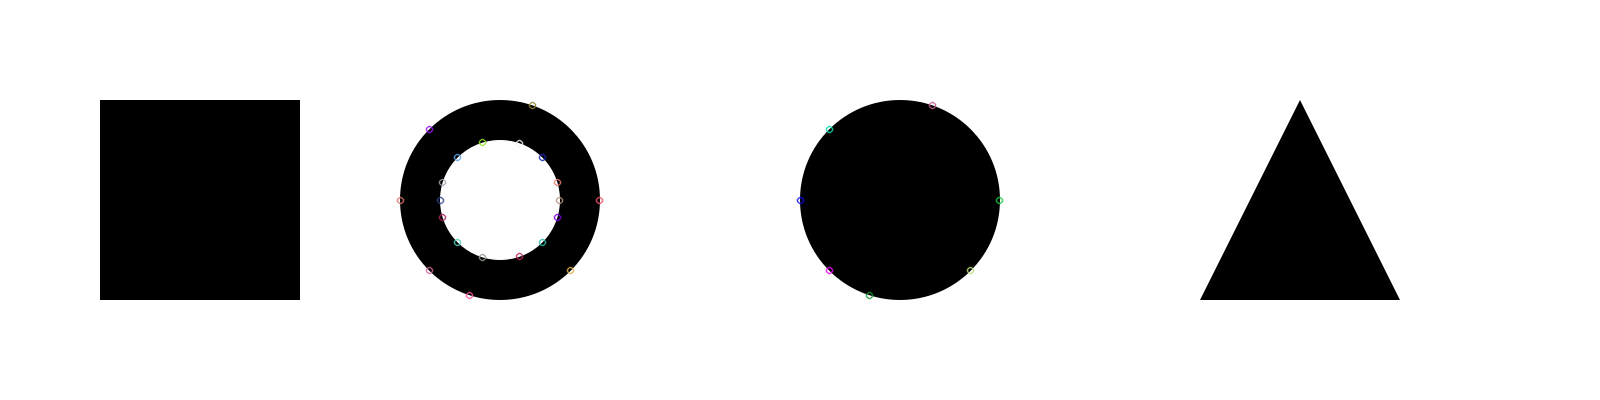

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/fish300x200.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/shapes/4shapes.jpg')

fast = cv2.FastFeatureDetector_create()

fast.setThreshold(10)
#fast.setNonmaxSuppression(False)

kp = fast.detect(img,None)
result=cv2.drawKeypoints(img,kp,None)


print("Threshold: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Total Keypoints with nonmaxSuppression: ", len(kp))

cv2_imshow(result)


## 03 얼굴 추적(Haar Cascades)

- Haar Cascades 기법: Paul Viola와 Michael Jones이 2001년에 발표한 논문, “Rapid Object Detection using a Boosted Cascade of Simple Features”에서 제안된 효과적인 물체 검출 방법
- 검출할 대상이 되는 물체가 있는 이미지(Positive Image)와 물체가 아닌 이미지(Negative Image)를 최대한 많이 활용해 다단계 함수를 훈련시키는 기계학습 방식
- 이 알고리즘은 분류자(Classifier)를 훈련시키기 위해 매우 많은 훈련용 이미지가 필요
- 이미지의 특징을 추출하기 위해 Haar feature가 사용 됨
  - 컨볼루션 커널(Convolutional Kernel)과 같음

    ![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/haar_features.jpg)

    ![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/haar.png) <img src="https://miro.medium.com/max/1400/1*luxeB8jLReBII2kG6UMX5g.png" alt="img" height="200"/>

- 트레이닝 결과를 xml 형태로 저장: [링크](https://github.com/opencv/opencv/tree/3.4/data/haarcascades)
- Cascade of Classifiers의 개념
  - 이미지에 6000개의 모든 특징을 적용하는 대신, 분류자의 다른 단계로 특징을 묶고 하나씩 하나씩 적용
  - 몇몇의 특징을 찾는데 실패하면 다른 특징도 찾지 않고 버림

  ![](https://miro.medium.com/max/1156/1*XX8WqHo0lyrgZfTTRQ3ESQ.jpeg)




```
cv2.CascadeClassifier.detectMultiScale(image scaleFactor, minNeighbors)
```
**Parameters:**
- image : 입력 이미지
- scaleFactor : 이미지 축소 비율
 ![](https://www.bogotobogo.com/python/OpenCV_Python/images/FaceDetection/ImageScale.png)
- minNeighbors : 얼마나 많은 이웃 사각형이 검출되어야 최종 검출 영역으로 설정할 것인지 지정.
  - 기본 값은 3
  - 숫자가 클 수록 얼굴이 더 적게 검출 되지만 정확도가 올라감.

In [30]:
from IPython.display import HTML
HTML('<iframe height="400" src="https://www.youtube.com/embed/hPCTwxF0qf4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


**03.1 얼굴 검출**

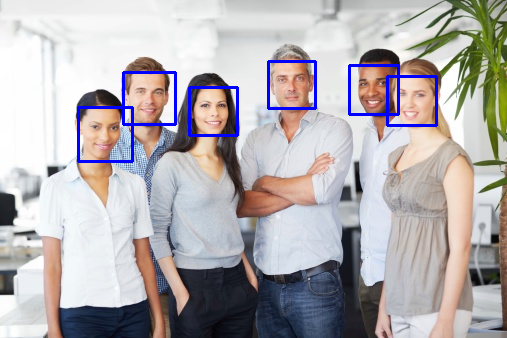

In [32]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people.jpg')
# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people_faces.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

faces = face_cascade.detectMultiScale(gray, 1.3, 3)
#faces = face_cascade.detectMultiScale(gray, 1.3, 2)

for (x,y,w,h) in faces:
     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

cv2_imshow(img)

**03.2 눈 검출**

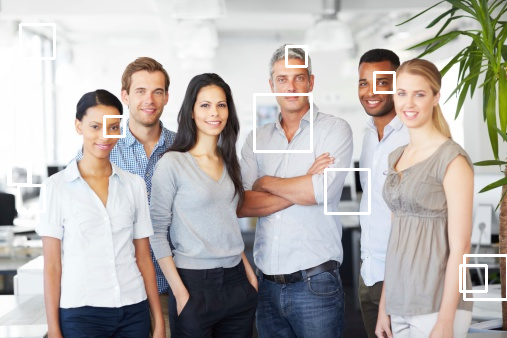

In [44]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people.jpg')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people_faces.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eye_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_eye.xml'))
eyes = eye_cascade.detectMultiScale(gray, 1.3, 0)

for (x,y,w,h) in eyes:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)

cv2_imshow(img)

**03.3 얼굴과 눈 검출**

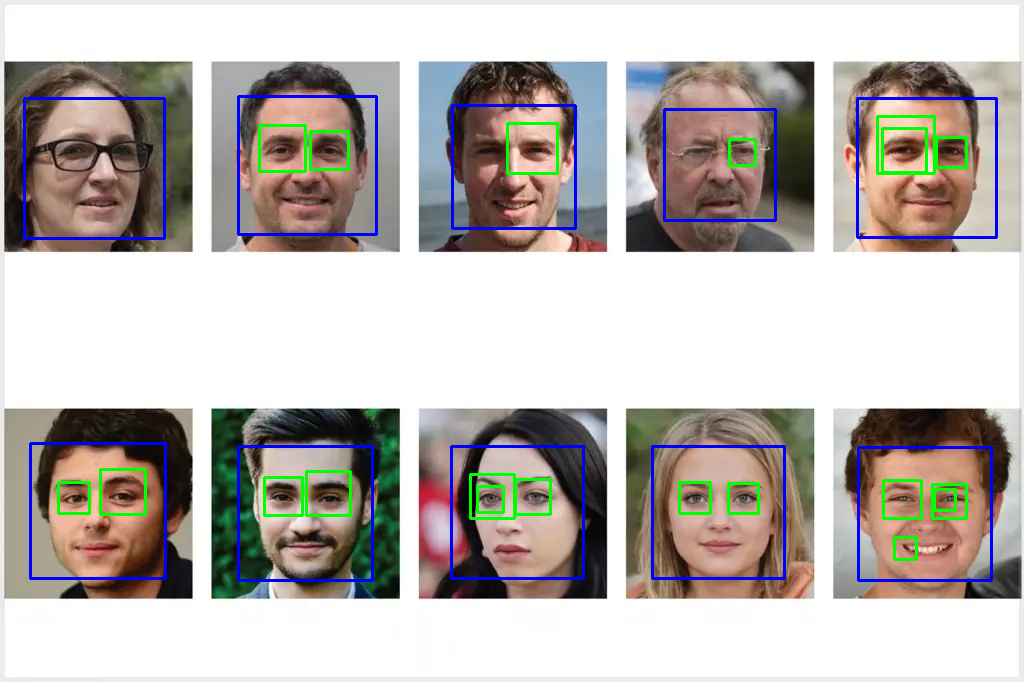

In [46]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people_faces.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_eye.xml'))

faces = face_cascade.detectMultiScale(gray, 1.3, 4)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 1)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(img)

**03.4 웃는 입 검출**

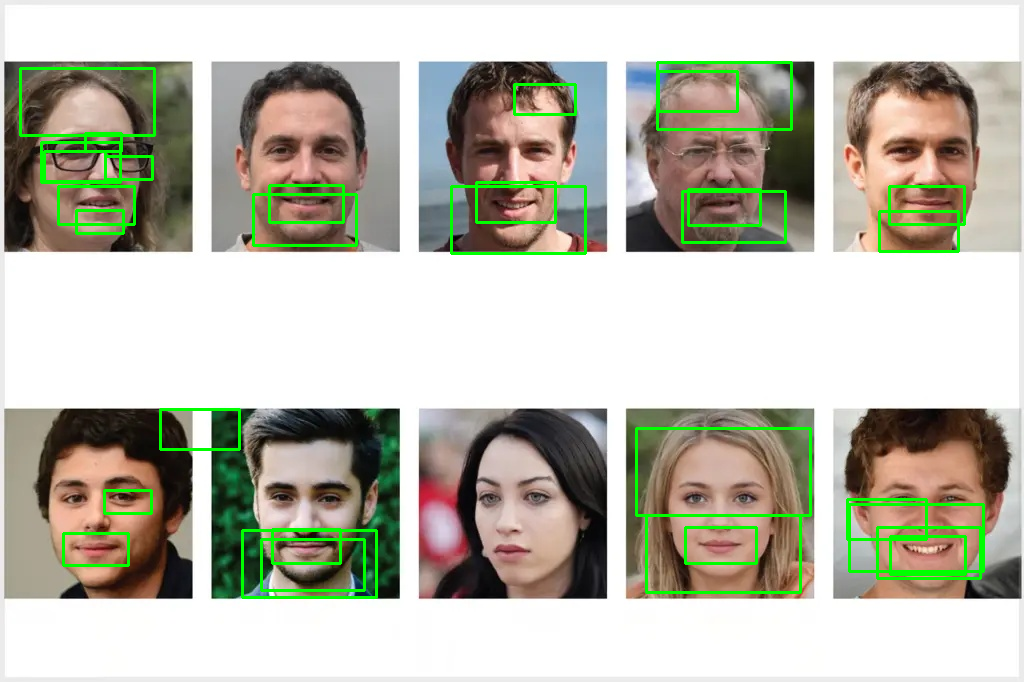

In [48]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people_faces.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

smile_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades +'haarcascade_smile.xml'))
smiles = smile_cascade.detectMultiScale(gray, 1.3, 2)
for (x,y,w,h) in smiles:
     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

cv2_imshow(img)

**03.5 얼굴과 웃는 입 검출**

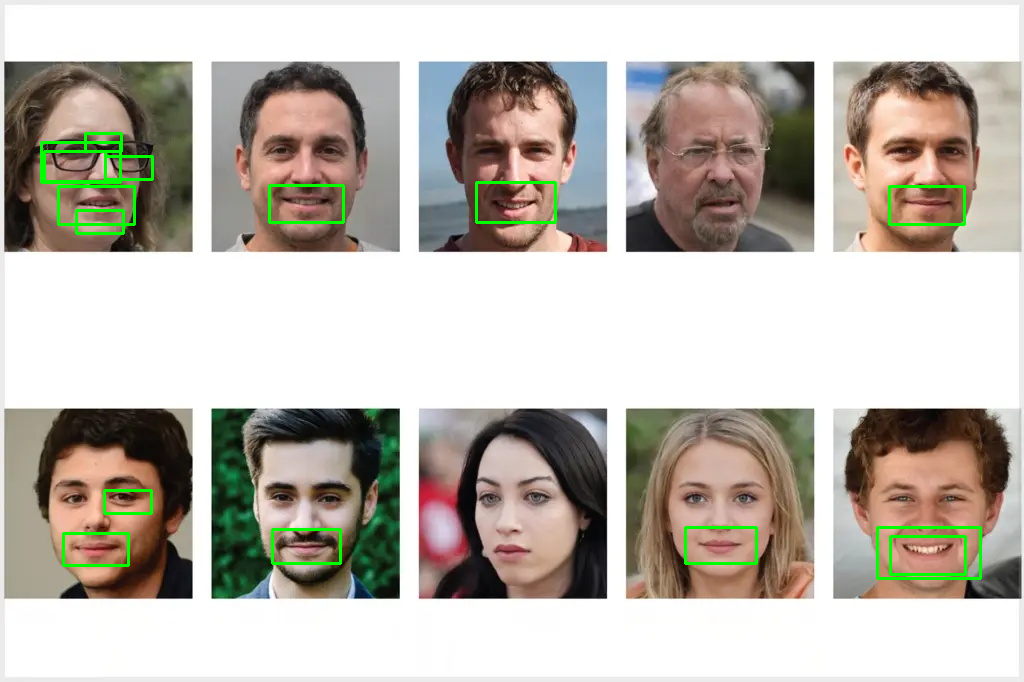

In [50]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/people_faces.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
smile_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades +'haarcascade_smile.xml'))

faces = face_cascade.detectMultiScale(gray, 1.3, 1)
smiles = smile_cascade.detectMultiScale(gray, 1.3, 2)

for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(img, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)

cv2_imshow(img)

## 04 코랩에서 비디오 카메라 사용하기

**04.1 코랩에서 제공하는 코드 불러오기**

Code Snippets 탭 선택 > 'Camera Capture' 검색 > 코드 삽입

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='myphoto.jpg', quality=0.9):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**04.2 웹캠을 사용해 얼굴 인식하기**
- 참고 링크: [How to Use Webcam In Google Colab for Images and Video](https://www.youtube.com/watch?v=YjWh7QvVH60)

In [ ]:
#필요한 라이브러리를 가져오기
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# 다른 확장자와 형식을 가진 이미지를 OpenCV 이미지 형식에 맞게 변환하는 함수
def js_to_image(js_reply):

  # base64 이미지로 디코드
  image_bytes = b64decode(js_reply.split(',')[1])
  # 넘파이 배열로 변환
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # 넘파이 배열을 OpenCV BGR 이미지로 변환
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [ ]:
# Haar Cascade Classifier 파일 불러오기
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# 웹캠 연결하고 사진 찍는 함수 설정
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # 사진 데이터 가져오기
  data = eval_js('takePhoto({})'.format(quality))
  # OpenCV 포멧으로 이미지 변환
  img = js_to_image(data)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  # Haar Cascade 함수를 사용해 얼굴 찾기
  faces = face_cascade.detectMultiScale(gray)
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

  #이미지 저장하기
  cv2.imwrite(filename, img)

  return filename

In [ ]:
# 웹캠 카메라 연결 후 사진찍기
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**04.3 실시간 얼굴 추적**

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def bbox_to_bytes(bbox_array):
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>